In [40]:
#Question 6: Did business-owners of a particular race/ethnicity get more loans? 
# If yes, is it statistiscally significant?

In [41]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import json

In [42]:
california_ppp_path = "../Resources/California_PPP.csv"

ppp_data = pd.read_csv(california_ppp_path)

ppp_data.head()

,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,CurrentApprovalAmount,RuralUrbanIndicator,...,JobsReported,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran
0,1048448901,04/24/2021,PPP,HUMANGOOD NORCAL,6120 Stoneridge Mall Rd Ste 300,Pleasanton,CA,94588-3298,10000000.0,U,...,500.0,623311.0,White,9999998.0,Sole Proprietorship,"Washington Federal Bank, National Association",SEATTLE,WA,Female Owned,Non-Veteran
1,1122827105,04/09/2020,PPP,ITO INCORPORATED,431 ISIS AVE,INGLEWOOD,CA,90301-2009,10000000.0,U,...,500.0,722310.0,Asian,9361000.0,Subchapter S Corporation,City National Bank,LOS ANGELES,CA,Male Owned,Non-Veteran
2,1187837109,04/10/2020,PPP,"HAVEN HEALTH GROUP, LLC","31752 COAST HWY, STE 300",LAGUNA BEACH,CA,92651-6782,10000000.0,U,...,500.0,623110.0,White,10000000.0,Limited Liability Company(LLC),East West Bank,PASADENA,CA,Male Owned,Non-Veteran
3,1321898800,04/10/2021,PPP,NORTH EAST MEDICAL SERVICES,2171 Junipero Serra Blvd,Daly City,CA,94014-1906,10000000.0,U,...,205.0,621498.0,Unanswered,10000000.0,501(c)3 – Non Profit,East West Bank,PASADENA,CA,Unanswered,Unanswered
4,1322998906,04/24/2021,PPP,PACIFIC CLINICS,800 S Santa Anita Ave,Arcadia,CA,91006-3536,10000000.0,U,...,103.0,621420.0,White,9999996.0,Non-Profit Organization,East West Bank,PASADENA,CA,Male Owned,Veteran


In [43]:
ethnicity_count = ppp_data["Race"].value_counts()
ethnicity_percentage=ethnicity_count/ppp_data["Race"].count() * 100
ethnicity_summary_df=pd.DataFrame({"Total Count": ethnicity_count,
                                   "Percentage of Ethnicities": ethnicity_percentage})
ethnicity_summary_df["Percentage of Ethnicities"]=ethnicity_summary_df["Percentage of Ethnicities"].map("{0:.2f}%".format)
ethnicity_summary_df

,Total Count,Percentage of Ethnicities
Unanswered,996716,76.54%
White,154152,11.84%
Asian,83281,6.40%
Black or African American,60352,4.63%
American Indian or Alaska Native,4644,0.36%
Native Hawaiian or Other Pacific Islander,3058,0.23%
Multi Group,27,0.00%
Puerto Rican,11,0.00%


<AxesSubplot:title={'center':'CurrentApprovalAmount'}, xlabel='Race'>

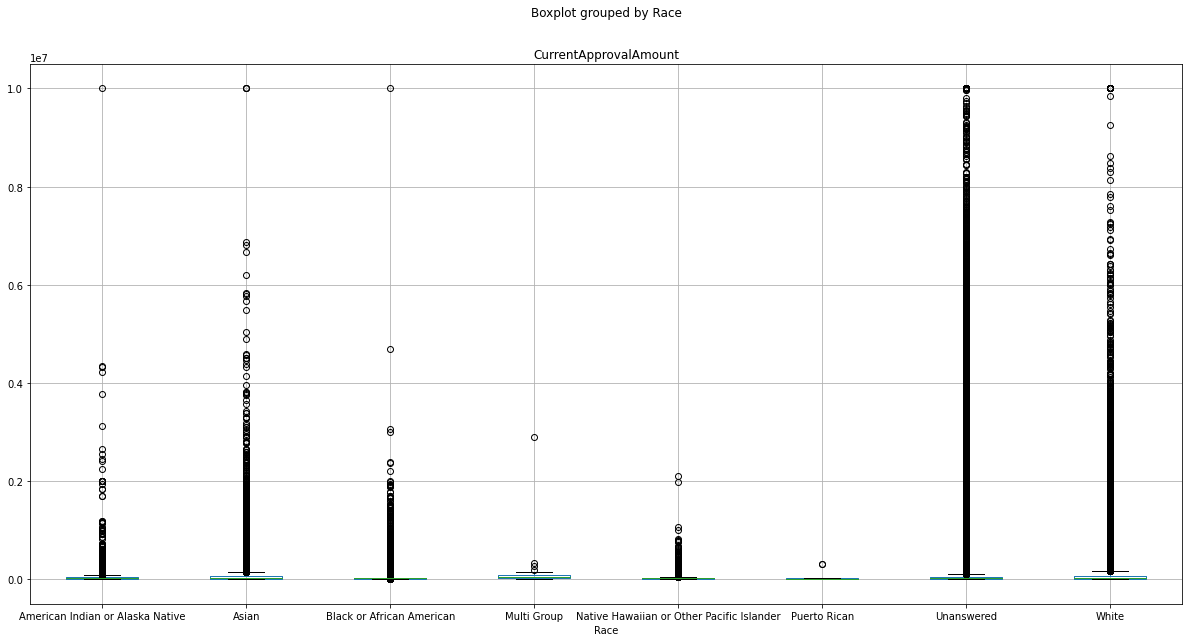

In [44]:
#boxplot
ppp_data.boxplot("CurrentApprovalAmount", by="Race", figsize=(20,10))

In [45]:
group1 = ppp_data[ppp_data["Race"] == "American Indian or Alaska Native"]["CurrentApprovalAmount"]
group2 = ppp_data[ppp_data["Race"] == "Asian"]["CurrentApprovalAmount"]
group3 = ppp_data[ppp_data["Race"] == "Black or African American"]["CurrentApprovalAmount"]
group4 = ppp_data[ppp_data["Race"] == "Multi Group"]["CurrentApprovalAmount"]
group5 = ppp_data[ppp_data["Race"] == "Native Hawaiian or Other Pacific Islander"]["CurrentApprovalAmount"]
group6 = ppp_data[ppp_data["Race"] == "Puerto Rican"]["CurrentApprovalAmount"]
group7 = ppp_data[ppp_data["Race"] == "Unanswered"]["CurrentApprovalAmount"]
group8 = ppp_data[ppp_data["Race"] == "White"]["CurrentApprovalAmount"]

In [46]:
#Stat Summary
stat_summary = ppp_data.groupby(["Race"])[["CurrentApprovalAmount"]].agg(['mean','median','var','std','sem'])
stat_summary

CurrentApprovalAmount            \
                                                           mean    median   
Race                                                                        
American Indian or Alaska Native                   63148.802944  20351.00   
Asian                                              68533.217920  24058.00   
Black or African American                          25202.523321  20377.75   
Multi Group                                       174341.129630  41995.00   
Native Hawaiian or Other Pacific Islander          39854.546593  20415.00   
Puerto Rican                                       68317.409091  14247.50   
Unanswered                                         81069.814366  20832.50   
White                                             100033.200020  20957.00   

                                                                        \
                                                    var            std   
Race                                                                     
American Indian or Alaska Native           6.301558e+10  251029.044450   
Asian                                      3.479062e+10  186522.426152   
Black or African American                  6.397136e+09   79982.095030   
Multi Group                                3.010817e+11  548709.098843   
Native Hawaiian or Other Pacific Islander  8.380929e+09   91547.414125   
Puerto Rican                               1.507517e+10  122780.963998   
Unanswered                                 8.269661e+10  287570.180121   
White                                      8.738311e+10  295606.341881   

                                                          
                                                     sem  
Race                                                      
American Indian or Alaska Native             3683.645828  
Asian                                         646.335619  
Black or African American                     325.571921  
Multi Group                                105599.115308  
Native Hawaiian or Other Pacific Islander    1655.492971  
Puerto Rican                                37019.853544  
Unanswered                                    288.043537  
White                                         752.903239

In [47]:
#Stat Summary
jobs_stat_summary = ppp_data.groupby(["Race"])[["JobsReported"]].agg(['mean','median','var','std','sem'])
jobs_stat_summary

JobsReported                      \
                                                  mean median          var   
Race                                                                         
American Indian or Alaska Native              7.260336    1.0   587.444810   
Asian                                         9.789220    4.0   637.991450   
Black or African American                     2.372929    1.0   131.024266   
Multi Group                                  19.481481    5.0  3542.643875   
Native Hawaiian or Other Pacific Islander     6.033682    1.0   639.000174   
Puerto Rican                                  4.000000    1.0    41.200000   
Unanswered                                    8.797630    2.0   781.658992   
White                                        10.449589    2.0   860.924550   

                                                                 
                                                 std        sem  
Race                                                             
American Indian or Alaska Native           24.237261   0.355662  
Asian                                      25.258493   0.087525  
Black or African American                  11.446583   0.046594  
Multi Group                                59.520113  11.454651  
Native Hawaiian or Other Pacific Islander  25.278453   0.457122  
Puerto Rican                                6.418723   1.935318  
Unanswered                                 27.958165   0.028004  
White                                      29.341516   0.074732

In [48]:
#ANOVA
stats.f_oneway(group1,group2,group3,group4,group5,group6,group7,group8)

F_onewayResult(statistic=489.0787582634207, pvalue=0.0)

In [49]:
#T-Test with White and Asian businesses
stats.ttest_ind(group8,group2,equal_var=False)

Ttest_indResult(statistic=31.74515998101095, pvalue=1.1055353492592183e-220)

In [50]:
#T-Test with Asian and Black businesses
stats.ttest_ind(group3,group2,equal_var=False)

Ttest_indResult(statistic=-59.87354273381556, pvalue=0.0)

In [51]:
#PPP
ppp_df = ppp_data.loc[ppp_data["ProcessingMethod"] == "PPP",:]

In [52]:
race_ppp_count = ppp_df["Race"].value_counts()
race_ppp_percentage=race_ppp_count/ppp_df["Race"].count() * 100
race_ppp_summary_df=pd.DataFrame({"Total Count": race_ppp_count,
                                   "Percentage of Ethnicities": race_ppp_percentage})
race_ppp_summary_df["Percentage of Ethnicities"]=race_ppp_summary_df["Percentage of Ethnicities"].map("{0:.2f}%".format)
race_ppp_summary_df

,Total Count,Percentage of Ethnicities
Unanswered,734160,77.53%
White,101898,10.76%
Black or African American,53148,5.61%
Asian,51928,5.48%
American Indian or Alaska Native,3372,0.36%
Native Hawaiian or Other Pacific Islander,2374,0.25%
Multi Group,20,0.00%
Puerto Rican,7,0.00%


In [53]:
ppp_df = ppp_data.loc[ppp_data["ProcessingMethod"] == "PPP",:]

ppp_df=ppp_df.loc[(ppp_df.Race == "American Indian or Alaska Native") | 
           (ppp_df.Race == "Asian") |
           (ppp_df.Race == "Black or African American") |
           (ppp_df.Race == "Multi Group") |
           (ppp_df.Race == "Native Hawaiian or Other Pacific Islander") |
           (ppp_df.Race == "Puerto Rican") |
           (ppp_df.Race == "White")]
ppp_df

,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,CurrentApprovalAmount,RuralUrbanIndicator,...,JobsReported,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran
0,1048448901,04/24/2021,PPP,HUMANGOOD NORCAL,6120 Stoneridge Mall Rd Ste 300,Pleasanton,CA,94588-3298,10000000.00,U,...,500.0,623311.0,White,9999998.00,Sole Proprietorship,"Washington Federal Bank, National Association",SEATTLE,WA,Female Owned,Non-Veteran
1,1122827105,04/09/2020,PPP,ITO INCORPORATED,431 ISIS AVE,INGLEWOOD,CA,90301-2009,10000000.00,U,...,500.0,722310.0,Asian,9361000.00,Subchapter S Corporation,City National Bank,LOS ANGELES,CA,Male Owned,Non-Veteran
2,1187837109,04/10/2020,PPP,"HAVEN HEALTH GROUP, LLC","31752 COAST HWY, STE 300",LAGUNA BEACH,CA,92651-6782,10000000.00,U,...,500.0,623110.0,White,10000000.00,Limited Liability Company(LLC),East West Bank,PASADENA,CA,Male Owned,Non-Veteran
4,1322998906,04/24/2021,PPP,PACIFIC CLINICS,800 S Santa Anita Ave,Arcadia,CA,91006-3536,10000000.00,U,...,103.0,621420.0,White,9999996.00,Non-Profit Organization,East West Bank,PASADENA,CA,Male Owned,Veteran
28,4152297705,05/01/2020,PPP,GENEVA STAFFING INC,15941 RED HILL SUITE 100,TUSTIN,CA,92780,10000000.00,U,...,500.0,NaN,White,10000000.00,Corporation,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302218,6261837307,04/30/2020,PPP,TERESA MATTOS ART,200 ELINOR ST,CAPITOLA,CA,95010-2316,49.00,U,...,1.0,611699.0,White,49.00,Sole Proprietorship,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran
1302224,8977007310,05/01/2020,PPP,BOBLY INC,170 PACIFIC AVENUE UNIT 52,SAN FRANCISCO,CA,94111,40.00,U,...,2.0,519190.0,White,40.00,Limited Liability Company(LLC),"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered
1302230,6498857409,05/14/2020,PPP,THYME ON THE COAST CUISINE,169 FLOWER ST,COSTA MESA,CA,92627-2835,28.00,U,...,1.0,722320.0,White,28.00,Sole Proprietorship,"Bank of America, National Association",CHARLOTTE,NC,Female Owned,Veteran
1302232,3534747808,05/26/2020,PPP,ANNE DRISCOLL,40044 HWY 49 Suite B1,Oakhurst,CA,93644-8875,24.17,R,...,2.0,451211.0,American Indian or Alaska Native,18.12,Sole Proprietorship,Celtic Bank Corporation,SALT LAKE CITY,UT,Unanswered,Non-Veteran


<AxesSubplot:title={'center':'CurrentApprovalAmount'}, xlabel='Race'>

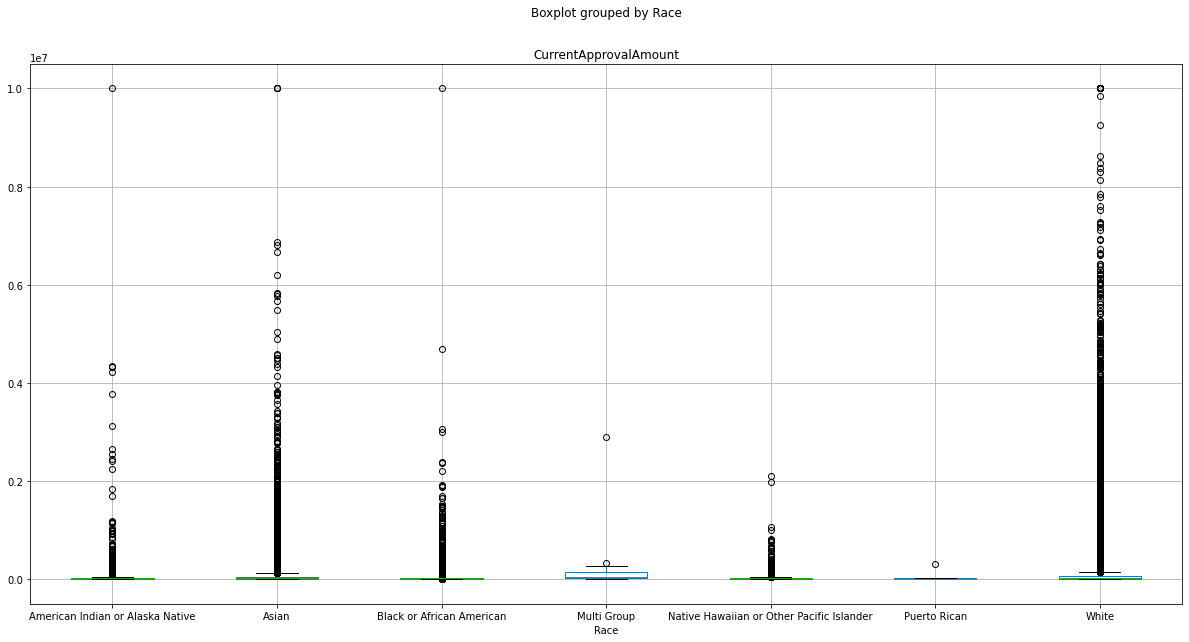

In [54]:
# boxplot
ppp_df.boxplot("CurrentApprovalAmount", by="Race", figsize=(20,10))

In [55]:
#ANOVA
group1 = ppp_df[ppp_df["Race"] == "American Indian or Alaska Native"]["CurrentApprovalAmount"]
group2 = ppp_df[ppp_df["Race"] == "Asian"]["CurrentApprovalAmount"]
group3 = ppp_df[ppp_df["Race"] == "Black or African American"]["CurrentApprovalAmount"]
group4 = ppp_df[ppp_df["Race"] == "Multi Group"]["CurrentApprovalAmount"]
group5 = ppp_df[ppp_df["Race"] == "Native Hawaiian or Other Pacific Islander"]["CurrentApprovalAmount"]
group6 = ppp_df[ppp_df["Race"] == "Puerto Rican"]["CurrentApprovalAmount"]
group7 = ppp_df[ppp_df["Race"] == "White"]["CurrentApprovalAmount"]

In [56]:
#Stat Summary
stat_summary = ppp_df.groupby(["Race"])[["CurrentApprovalAmount"]].mean()
stat_summary

,CurrentApprovalAmount
Race,
American Indian or Alaska Native,56916.692364
Asian,65242.057261
Black or African American,22583.140304
Multi Group,223578.550000
Native Hawaiian or Other Pacific Islander,34632.503576
Puerto Rican,55588.071429
White,99394.734056


In [57]:
#Stat Summary with employee number
jobs_stat_summary = ppp_df.groupby(["Race"])[["JobsReported"]].mean()
jobs_stat_summary

,JobsReported
Race,
American Indian or Alaska Native,6.594009
Asian,9.920448
Black or African American,2.007357
Multi Group,25.000000
Native Hawaiian or Other Pacific Islander,5.588880
Puerto Rican,4.285714
White,10.656441


In [58]:
stats.f_oneway(group1,group2,group3,group4,group5,group6,group8)

F_onewayResult(statistic=543.6592588431806, pvalue=0.0)

In [74]:
#T-Test with white and others
stats.ttest_ind(group7,group1,equal_var=False)

Ttest_indResult(statistic=-0.07444216505696485, pvalue=0.9406701596003005)

In [ ]:
stats.ttest_ind(group7,group2,equal_var=False)

In [ ]:
stats.ttest_ind(group7,group3,equal_var=False)

In [ ]:
stats.ttest_ind(group7,group4,equal_var=False)

In [ ]:
stats.ttest_ind(group7,group5,equal_var=False)

In [ ]:
stats.ttest_ind(group7,group6,equal_var=False)